In [1]:
# Enclosed Energy Tutorial

In [17]:
import numpy as np

from scipy.stats import norm

from matplotlib import pyplot as plt
 
from felpy.utils.vis_utils import Grids, exfel_c1, exfel_c2

from felpy.model.src.coherent import construct_SA1_wavefront
from felpy.analysis.optics.enclosed_energy import get_enclosed_energy
from felpy.analysis.optics.centroid import get_com


from wpg.wpg_uti_wf import plot_intensity_map

The beam radius is: 58.2499288970487 pixels
The beam center of mass is located at: [511.50004197 511.50004173]


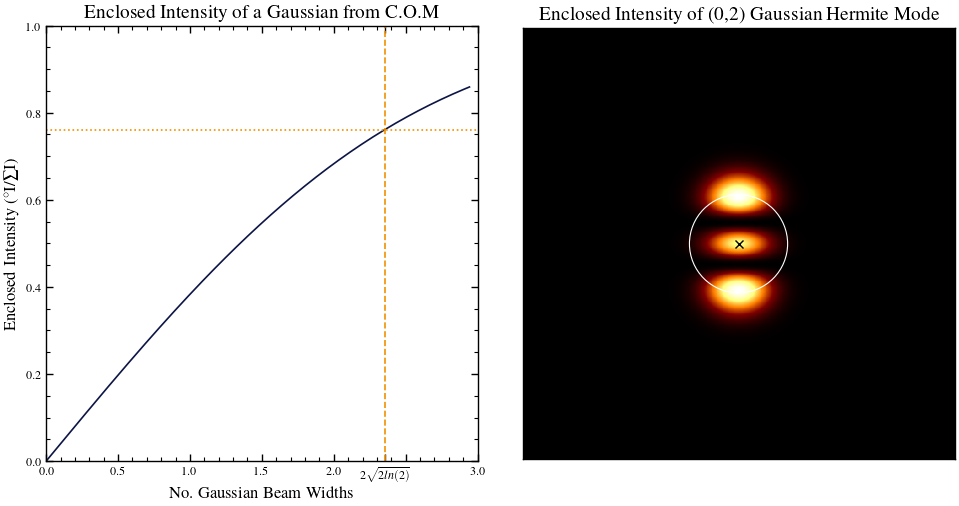

In [77]:
plots = Grids(global_aspect = 2, scale = 1.75)
plots.create_grid(n = 1, m = 2, sharex = False, sharey = False, fontsize = 12)
[ax1, ax2] = plots.axes

wfr = construct_SA1_wavefront(1024,1024,5,0.25,mx = 0,my = 2)
ii = wfr.get_intensity().sum(-1)

dx = dy = 1 ### for demonstration purposes we set the pixel size of the image ii to be 1.
rad, error = get_enclosed_energy(ii, dx, dy)
print("The beam radius is: {} pixels".format(rad[0]))

com = get_com(ii)
print("The beam center of mass is located at: {}".format(com))

ax2.imshow(ii, cmap = 'afmhot')
 

circle = plt.Circle(com, rad[0], color='w', fill=False)

ax2.add_patch(circle)

ax2.set_xlim(ii.shape[0]/4,3*ii.shape[0]/4)
ax2.set_ylim(ii.shape[1]/4,3*ii.shape[1]/4)

ax2.set_xticks([])
ax2.set_yticks([])

ax2.plot(com[0],com[1], marker = 'x', color = 'k',markersize = 6)


fwhm = np.sqrt(2*np.log(2))

x = np.linspace(0,fwhm*1.25,150)
ax1.plot(2*x, norm.cdf(x)-norm.cdf(-x), color = exfel_c1)

ax1.plot(np.ones(100)*2*np.sqrt(2*np.log(2)), 
         np.linspace(0,1,100), color = exfel_c2)

ax1.plot(np.linspace(0,5,100),
        np.ones(100)*(norm.cdf(fwhm)-norm.cdf(-fwhm)), color = exfel_c2)

ax1.set_xlim(0,3)
ax1.set_ylim(0,1)


xt = ax1.get_xticks() 
xt = np.append(xt,2*np.sqrt(2*np.log(2)))

xtl=xt.tolist()
xtl[-1]="2$\sqrt{2ln(2)}$"
xtl[-3] = ""

ax1.set_xticks(xt)
ax1.set_xticklabels(xtl)

ax1.set_xlabel("No. Gaussian Beam Widths", fontsize = 12)
ax1.set_ylabel("Enclosed Intensity ($^\circ$I/$\sum$I)", fontsize = 12)

ax1.set_title("Enclosed Intensity of a Gaussian from C.O.M", fontsize = 14)
ax2.set_title("Enclosed Intensity of (0,2) Gaussian Hermite Mode", fontsize = 14)

plots.fig.savefig("enclosed_energy_graphic.png")